In [1]:
## Dependencies 

from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# 1 - Online Passive - Agressive Algorithms

## 1.1 Implementation of 3 versions of algorithm

In [2]:
"""
## To do 
- Try plotting it on various values of w
- Compare it datasets
- Look into kernalized implementations
- 

"""

'\n## To do \n- Try plotting it on various values of w\n- Compare it datasets\n- Look into kernalized implementations\n- \n\n'

In [53]:
def update(mode, x_i, loss_i, C=10000):
    
    if mode == 'classic':
        return loss_i/(np.linalg.norm(x_i)**2)
        
    elif mode == 'first_relax':
        return min(C, loss_i/(np.linalg.norm(x_i)**2))
    
    elif mode == 'second_relax':
        return loss_i/((np.linalg.norm(x_i)**2) + (1/2*C))
        

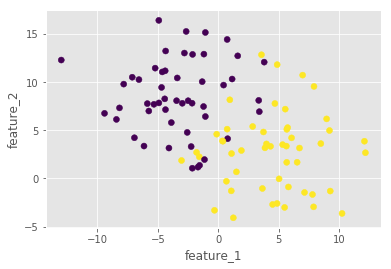

In [201]:
## Randomly generate dataset and plot
n_samples=100
n_features=2
centers=2
X, Y = make_blobs(n_samples, n_features, centers, random_state= 42, 
                  cluster_std=4.0, center_box=(-10.0, 10.0))

## Plot
plt.scatter(X[:,0], X[:,1], c = Y)
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()

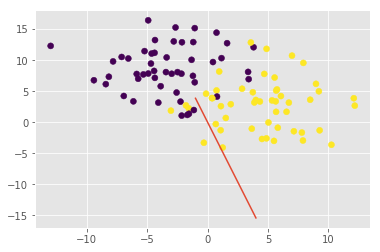

In [232]:
## Passive - Aggressive Algo
mode = 'classic'
C = 0.001
w = np.random.rand(1,n_features)**100 #**100 for small wt values
#w = np.zeros((1,n_features))
iterations = 10
for i in range(iterations):
    x_i = X[i,:]
    y_hat_i = 1 if np.matmul(w,x_i.T) > 0 else 0
    #print(np.matmul(w,x_i.T))
    y_i = -1 if Y[i] == 0 else 1
    loss_i = max(0, 1 - y_i*(np.matmul(w,x_i.T)))
    t_i = update(mode, x_i, loss_i, C)
    w += t_i*y_i*x_i
    
    
# Calculating classifier
x_1 = np.linspace(-1,4,4)
x_2 = -(x_1*w[0][0])/w[0][1]

# Plotting
plt.scatter(X[:,0], X[:,1], c = Y)
plt.plot(x_1,x_2)
plt.show()

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
style.use('ggplot')


# Plots for Q-learning

## Fixed Environment

In [4]:
### Load the pickled dictionaries 

## Accuracies for Q-learning algo on Fixed environment
with open('Data/epsilon_episode_accuracy.pickle', 'rb') as handle:
    epsilon_episode_accuracy = pickle.load(handle)
with open('Data/gamma_episode_accuracy.pickle', 'rb') as handle:
    gamma_episode_accuracy = pickle.load(handle)
with open('Data/alpha_episode_accuracy.pickle', 'rb') as handle:
    alpha_episode_accuracy = pickle.load(handle)
with open('Data/agent_episode_accuracy.pickle', 'rb') as handle:
    agent_ran_episode_accuracy = pickle.load(handle)

## Accuracies for Deep Q-learning algo on Fixed environment
with open('Data/d_epsilon_episode_accuracy.pickle', 'rb') as handle:
    d_epsilon_episode_accuracy = pickle.load(handle)
with open('Data/d_gamma_episode_accuracy.pickle', 'rb') as handle:
    d_gamma_episode_accuracy = pickle.load(handle)
with open('Data/d_alpha_episode_accuracy.pickle', 'rb') as handle:
    d_alpha_episode_accuracy = pickle.load(handle)
with open('Data/d_agent_episode_accuracy.pickle', 'rb') as handle:
    d_agent_ran_episode_accuracy = pickle.load(handle)

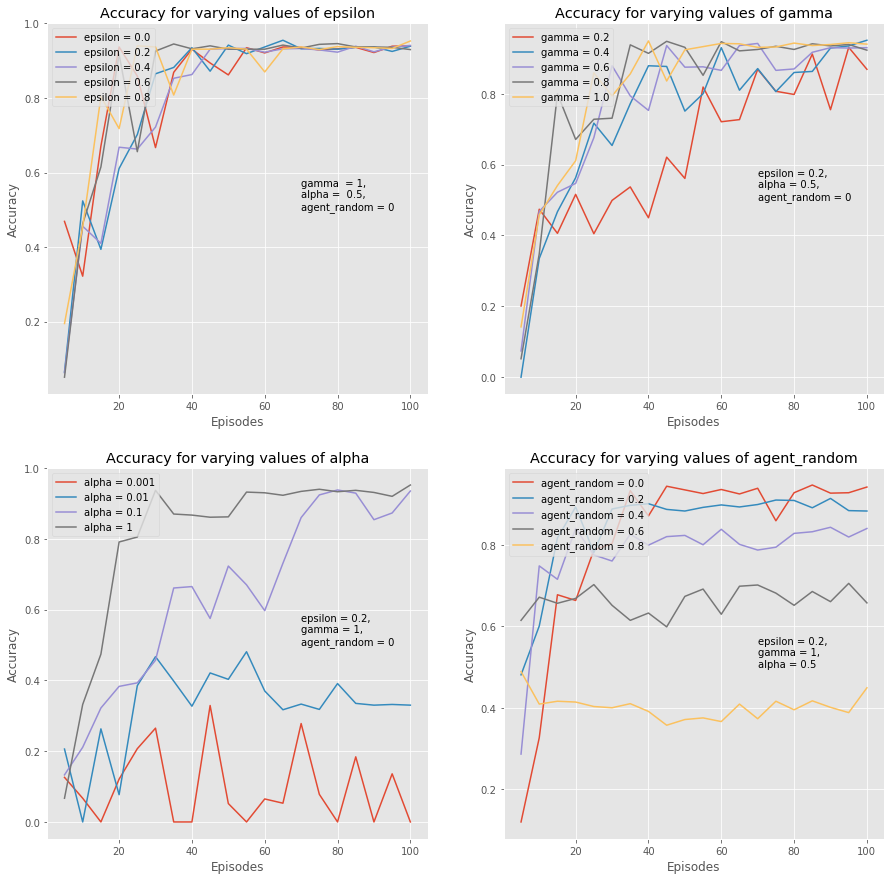

In [14]:
### Basic Q-learning
plt.figure(figsize= (15,15))


## Create a list of accuracies 
basic_accuracy = [epsilon_episode_accuracy, gamma_episode_accuracy, 
                  alpha_episode_accuracy, agent_ran_episode_accuracy]

hyperparams = ['epsilon', 'gamma', 'alpha', 'agent_random']
plot_dict = {'epsilon':['Accuracy for varying values of epsilon',
                        'Episodes', 'Accuracy', ('gamma ','1'),('alpha',' 0.5'), ('agent_random' ,'0')],
             'gamma':['Accuracy for varying values of gamma',
                        'Episodes', 'Accuracy', ('epsilon' ,'0.2'),('alpha','0.5'), ('agent_random','0')],
             'alpha':['Accuracy for varying values of alpha',
                        'Episodes', 'Accuracy', ('epsilon','0.2'),('gamma','1'),('agent_random','0')],
             'agent_random':['Accuracy for varying values of agent_random',
                        'Episodes', 'Accuracy', ('epsilon','0.2'),('gamma','1'), ('alpha','0.5')]}
range_x = [i for i in range(5,101,5)]

for n,accuracy in enumerate(basic_accuracy):
    
    title, x_axis, y_axis, txt_1, txt_2, txt_3 = plot_dict[hyperparams[n]]
    temp_accuracy =  list(accuracy.keys())
    temp_legend = ['{} = {}'.format(hyperparams[n], i) for i in temp_accuracy]
    
    plt.subplot(2, 2, n+1)
    plt.title(title)
    for item in accuracy.items():
        plt.plot(range_x, item[1])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.legend(temp_legend, loc='upper left')
    plt.text(70, 0.5,'{} = {}, \n{} = {},\n{} = {}'.format(txt_1[0],txt_1[1], 
                                                      txt_2[0], txt_2[1],
                                                      txt_3[0], txt_3[1]))

plt.savefig('q_learn.png')
plt.show()

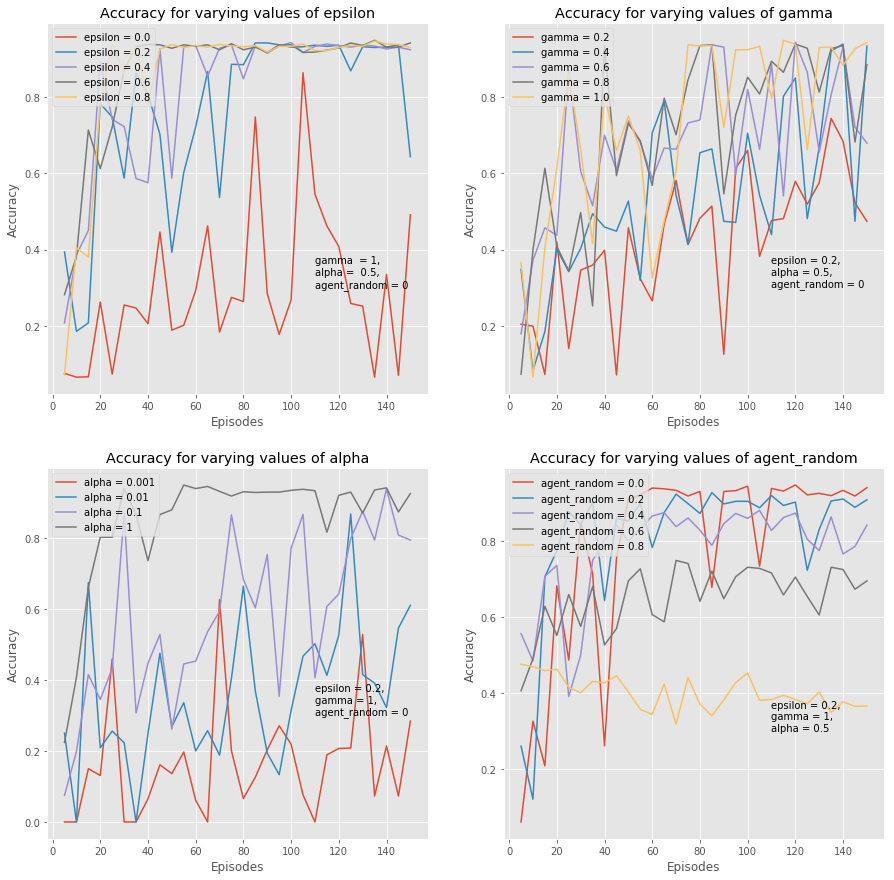

In [17]:
### Deep Q-learning
plt.figure(figsize= (15,15))


## Create a list of accuracies 
deep_accuracy = [d_epsilon_episode_accuracy, d_gamma_episode_accuracy, 
                  d_alpha_episode_accuracy, d_agent_ran_episode_accuracy]



hyperparams = ['epsilon', 'gamma', 'alpha', 'agent_random']
plot_dict = {'epsilon':['Accuracy for varying values of epsilon',
                        'Episodes', 'Accuracy', ('gamma ','1'),('alpha',' 0.5'), ('agent_random' ,'0')],
             'gamma':['Accuracy for varying values of gamma',
                        'Episodes', 'Accuracy', ('epsilon' ,'0.2'),('alpha','0.5'), ('agent_random','0')],
             'alpha':['Accuracy for varying values of alpha',
                        'Episodes', 'Accuracy', ('epsilon','0.2'),('gamma','1'),('agent_random','0')],
             'agent_random':['Accuracy for varying values of agent_random',
                        'Episodes', 'Accuracy', ('epsilon','0.2'),('gamma','1'), ('alpha','0.5')]}
range_x = [i for i in range(5,151,5)]

for n,accuracy in enumerate(deep_accuracy):
    
    title, x_axis, y_axis, txt_1, txt_2, txt_3 = plot_dict[hyperparams[n]]
    temp_accuracy =  list(accuracy.keys())
    temp_legend = ['{} = {}'.format(hyperparams[n], i) for i in temp_accuracy]
    
    plt.subplot(2, 2, n+1)
    plt.title(title)
    for item in accuracy.items():
        plt.plot(range_x, item[1])
    plt.ylim(0,1)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.legend(temp_legend, loc='upper left')
    plt.text(110, 0.3,'{} = {}, \n{} = {},\n{} = {}'.format(txt_1[0],txt_1[1], 
                                                      txt_2[0], txt_2[1],
                                                      txt_3[0], txt_3[1]))

plt.savefig('deep_q_learn.png')
plt.show()

## Random Environment

In [23]:
### Load the pickled dictionaries 

## Accuracies for Q-learning algo on Random environment
with open('Data/r_epsilon_episode_accuracy.pickle', 'rb') as handle:
    r_epsilon_episode_accuracy = pickle.load(handle)
with open('Data/r_gamma_episode_accuracy.pickle', 'rb') as handle:
    r_gamma_episode_accuracy = pickle.load(handle)
with open('Data/r_alpha_episode_accuracy.pickle', 'rb') as handle:
    r_alpha_episode_accuracy = pickle.load(handle)
with open('Data/r_agent_episode_accuracy.pickle', 'rb') as handle:
    r_agent_ran_episode_accuracy = pickle.load(handle)


## Accuracies for Deep Q-learning algo on Random environment
with open('Data/rd_epsilon_episode_accuracy.pickle', 'rb') as handle:
    rd_epsilon_episode_accuracy = pickle.load(handle)
with open('Data/rd_gamma_episode_accuracy.pickle', 'rb') as handle:
    rd_gamma_episode_accuracy = pickle.load(handle)
with open('Data/rd_alpha_episode_accuracy.pickle', 'rb') as handle:
    rd_alpha_episode_accuracy = pickle.load(handle)
with open('Data/rd_agent_episode_accuracy.pickle', 'rb') as handle:
    rd_agent_ran_episode_accuracy = pickle.load(handle)

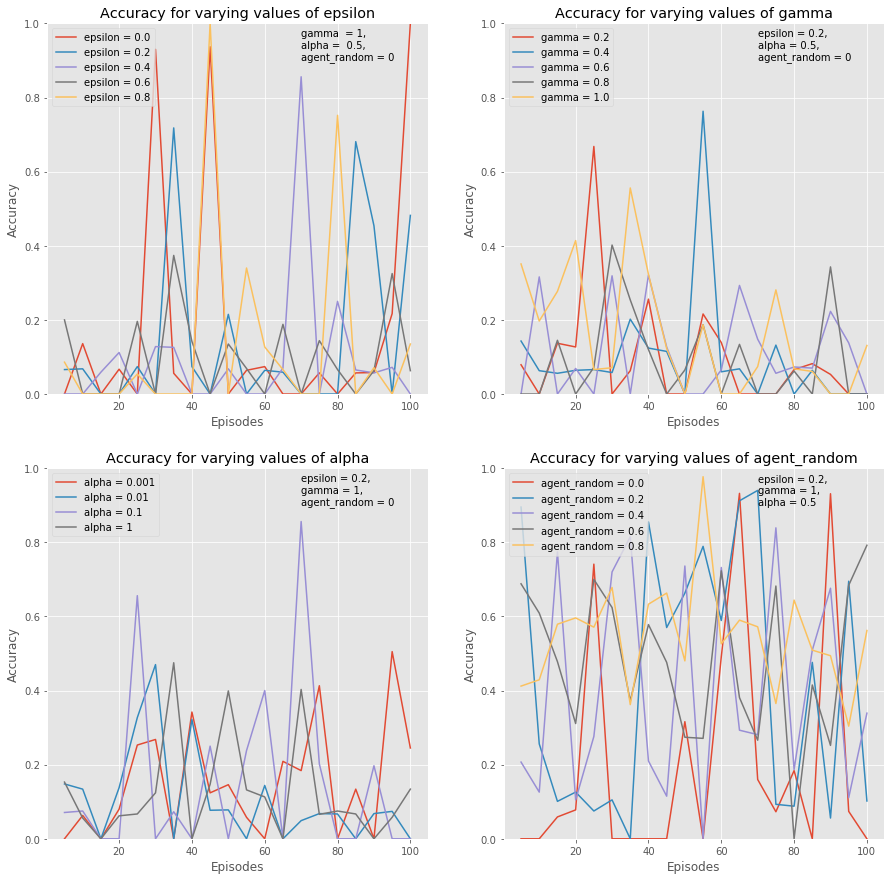

In [28]:
### Basic Q-learning
plt.figure(figsize= (15,15))


## Create a list of accuracies 
basic_accuracy = [r_epsilon_episode_accuracy, r_gamma_episode_accuracy, 
                  r_alpha_episode_accuracy, r_agent_ran_episode_accuracy]

hyperparams = ['epsilon', 'gamma', 'alpha', 'agent_random']
plot_dict = {'epsilon':['Accuracy for varying values of epsilon',
                        'Episodes', 'Accuracy', ('gamma ','1'),('alpha',' 0.5'), ('agent_random' ,'0')],
             'gamma':['Accuracy for varying values of gamma',
                        'Episodes', 'Accuracy', ('epsilon' ,'0.2'),('alpha','0.5'), ('agent_random','0')],
             'alpha':['Accuracy for varying values of alpha',
                        'Episodes', 'Accuracy', ('epsilon','0.2'),('gamma','1'),('agent_random','0')],
             'agent_random':['Accuracy for varying values of agent_random',
                        'Episodes', 'Accuracy', ('epsilon','0.2'),('gamma','1'), ('alpha','0.5')]}
range_x = [i for i in range(5,101,5)]

for n,accuracy in enumerate(basic_accuracy):
    
    title, x_axis, y_axis, txt_1, txt_2, txt_3 = plot_dict[hyperparams[n]]
    temp_accuracy =  list(accuracy.keys())
    temp_legend = ['{} = {}'.format(hyperparams[n], i) for i in temp_accuracy]
    
    plt.subplot(2, 2, n+1)
    plt.title(title)
    for item in accuracy.items():
        plt.plot(range_x, item[1])
    plt.ylim(0,1)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.legend(temp_legend, loc='upper left')
    plt.text(70, 0.9,'{} = {}, \n{} = {},\n{} = {}'.format(txt_1[0],txt_1[1], 
                                                      txt_2[0], txt_2[1],
                                                      txt_3[0], txt_3[1]))

plt.savefig('q_learn_random.png')
plt.show()

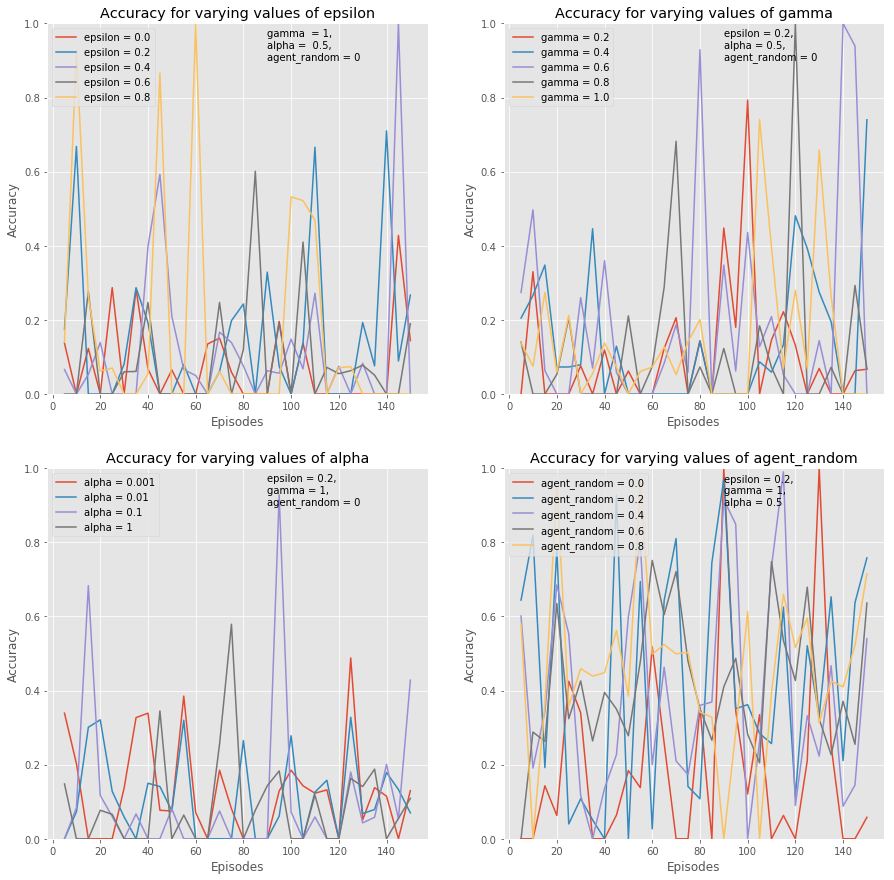

In [29]:
### Deep Q-learning
plt.figure(figsize= (15,15))


## Create a list of accuracies 
deep_accuracy = [rd_epsilon_episode_accuracy, rd_gamma_episode_accuracy, 
                  rd_alpha_episode_accuracy, rd_agent_ran_episode_accuracy]



hyperparams = ['epsilon', 'gamma', 'alpha', 'agent_random']
plot_dict = {'epsilon':['Accuracy for varying values of epsilon',
                        'Episodes', 'Accuracy', ('gamma ','1'),('alpha',' 0.5'), ('agent_random' ,'0')],
             'gamma':['Accuracy for varying values of gamma',
                        'Episodes', 'Accuracy', ('epsilon' ,'0.2'),('alpha','0.5'), ('agent_random','0')],
             'alpha':['Accuracy for varying values of alpha',
                        'Episodes', 'Accuracy', ('epsilon','0.2'),('gamma','1'),('agent_random','0')],
             'agent_random':['Accuracy for varying values of agent_random',
                        'Episodes', 'Accuracy', ('epsilon','0.2'),('gamma','1'), ('alpha','0.5')]}
range_x = [i for i in range(5,151,5)]

for n,accuracy in enumerate(deep_accuracy):
    
    title, x_axis, y_axis, txt_1, txt_2, txt_3 = plot_dict[hyperparams[n]]
    temp_accuracy =  list(accuracy.keys())
    temp_legend = ['{} = {}'.format(hyperparams[n], i) for i in temp_accuracy]
    
    plt.subplot(2, 2, n+1)
    plt.title(title)
    for item in accuracy.items():
        plt.plot(range_x, item[1])
    plt.ylim(0,1)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.legend(temp_legend, loc='upper left')
    plt.text(90, 0.9,'{} = {}, \n{} = {},\n{} = {}'.format(txt_1[0],txt_1[1], 
                                                      txt_2[0], txt_2[1],
                                                      txt_3[0], txt_3[1]))

plt.savefig('deep_q_learn_random.png')
plt.show()

In [28]:
import pickle

In [3]:
from q_learning import Q_learn

/Users/allwynjoseph/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
## Constants
rows = 4
cols = 4
actions = [0, 1, 2, 3]

## Hyperparameters
epsilon = 0.1
gamma = 1
alpha = 0.5
agent_random_test = 0.1 # Probability with which agent moves randomly during test time
dropout = 0.9 # Dropuout for the frist hidden layer of the MLP (ignore if q_learn_type = "Basic")
nn_layers = [8,4] # Number of neurons on each hidden layer of the MLP (ignore if q_learn_type = "Basic")

## Tunable parameters
#q_learn_type = "Basic" # Basic or Deep
random_envi = False  # True or False : True changes environment every episode
#episodes = 11 # Number of episodes 
iterations = 100 # Number of iterations for each episode
agent_dispalay = 100 # Frequencey with which agent's movements within enviroment are displayed
metrics_display = 100 # Frequence with which the policy and the state-value matrices are displayed

## Basic Fixed Environment

In [6]:
"""
Epsilon
- Basic Q- Learn
- Check for epsilon values 0.0, 0.2, 0.4, 0.6, 0.8
- gamma = 1
- alpha = 0.5
- agent_random_test = 0
"""
#epsilon = 0.1
gamma = 1
alpha = 0.5
agent_random_test = 0
q_learn_type = "Basic"

epsilon_episode_accuracy = dict()
epsilon_episode_steps = dict()
episodes = [int(5*i) for i in range(1,21)]
epsilons = [round(0.2*i,1) for i in range(5)]
    

for epsilon in epsilons:
    epsilon_episode_accuracy[epsilon] = list()
    epsilon_episode_steps[epsilon] = list()
    
    for episode in episodes:

            q_learn = Q_learn(rows, cols, actions, episode, epsilon, alpha, gamma, iterations, 
                              agent_random_test, nn_layers, dropout, q_learn_type, agent_dispalay, 
                              metrics_display, random_envi)
            avg_accuracy, avg_steps = q_learn.q_testing(test_episodes = 1000, grid_display = False)

            epsilon_episode_accuracy[epsilon].append(avg_accuracy)
            epsilon_episode_steps[epsilon].append(avg_steps)

The training environment

 . | . | . | .
---------------
 . | . | W | .
---------------
 P | . | . | .
---------------
 . | . | T | .


The value and policy matrix after 0 episodes:

 -------Policy Matrix-------	 	 ----State Value Matrix----

 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Right | Left  | Left  	 	 -5.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0 
 
 

##################  BEGIN TESTING ################### 

Accuracy is 0.059
Average steps take to finish is 0
The training environment

 . | . | . | .
---------------
 . | . | W | .
---------------
 P | . | . | .
---------------
 . | . | T | .


The value and policy matrix after 0 episodes:

 -------Policy Matrix-------	 	 ----State Value Matrix----

 Up    | Up    | Up    | Left  	 	 0.0 | 0.0 | 0.0 | -0.5
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | -0.5
 Left  | Right | Right | Right 	 	 -5.0 | 0.0 | 0.0 | 0

In [8]:
"""
Gamma
- Basic Q- Learn
- Check for gamma values 0.2, 0.4, 0.6, 0.8, 1.0
- epsilon = 0.1
- alpha = 0.5
- agent_random_test = 0
"""
epsilon = 0.1
#gamma = 1
alpha = 0.5
agent_random_test = 0
q_learn_type = "Basic"

gamma_episode_accuracy = dict()
gamma_episode_steps = dict()
episodes = [int(5*i) for i in range(1,21)]
gammas = [round(0.2*i,1) for i in range(1,6)]
    

for gamma in gammas:
    gamma_episode_accuracy[gamma] = list()
    gamma_episode_steps[gamma] = list()
    
    for episode in episodes:

            q_learn = Q_learn(rows, cols, actions, episode, epsilon, alpha, gamma, iterations, 
                              agent_random_test, nn_layers, dropout, q_learn_type, agent_dispalay, 
                              metrics_display, random_envi)
            avg_accuracy, avg_steps = q_learn.q_testing(test_episodes = 1000, grid_display = False)

            gamma_episode_accuracy[gamma].append(avg_accuracy)
            gamma_episode_steps[gamma].append(avg_steps)

The training environment

 . | . | . | .
---------------
 . | . | W | .
---------------
 P | . | . | .
---------------
 . | . | T | .


The value and policy matrix after 0 episodes:

 -------Policy Matrix-------	 	 ----State Value Matrix----

 Up    | Up    | Up    | Left  	 	 0.0 | 0.0 | 0.0 | -0.5
 Left  | Left  | Left  | Right 	 	 0.0 | 0.0 | 0.0 | -0.5
 Left  | Right | Right | Up    	 	 -5.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0 
 
 

##################  BEGIN TESTING ################### 

Accuracy is 0.0
The training environment

 . | . | . | .
---------------
 . | . | W | .
---------------
 P | . | . | .
---------------
 . | . | T | .


The value and policy matrix after 0 episodes:

 -------Policy Matrix-------	 	 ----State Value Matrix----

 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 -5.0 | 0.0 | 0.0 | 0.0
 Down  | Right | Left  | Left  	 

In [9]:
gamma_episode_accuracy

{0.2: [0.0,
  0.347,
  0.343,
  0.466,
  0.391,
  0.373,
  0.582,
  0.487,
  0.5,
  0.545,
  0.645,
  0.645,
  0.745,
  0.673,
  0.529,
  0.86,
  0.868,
  0.796,
  0.864,
  0.872],
 0.4: [0.057,
  0.259,
  0.533,
  0.401,
  0.487,
  0.59,
  0.816,
  0.678,
  0.742,
  0.885,
  0.932,
  0.87,
  0.941,
  0.945,
  0.875,
  0.802,
  0.86,
  0.861,
  0.872,
  0.849],
 0.6: [0.0,
  0.388,
  0.516,
  0.819,
  0.838,
  0.754,
  0.789,
  0.782,
  0.869,
  0.941,
  0.931,
  0.805,
  0.947,
  0.937,
  0.934,
  0.916,
  0.943,
  0.937,
  0.911,
  0.932],
 0.8: [0.267,
  0.49,
  0.607,
  0.747,
  0.872,
  0.733,
  0.872,
  0.805,
  0.936,
  0.932,
  0.94,
  0.93,
  0.931,
  0.928,
  0.933,
  0.925,
  0.931,
  0.927,
  0.938,
  0.92],
 1.0: [0.186,
  0.322,
  0.608,
  0.668,
  0.809,
  0.806,
  0.819,
  0.867,
  0.924,
  0.933,
  0.938,
  0.931,
  0.946,
  0.926,
  0.943,
  0.954,
  0.913,
  0.945,
  0.922,
  0.913]}

In [10]:
"""
Alpha
- Basic Q- Learn
- Check for alpha values 0.005, 0.05, 0.5, 1
- epsilon = 0.1
- gamma = 1
- agent_random_test = 0
"""
epsilon = 0.1
gamma = 1
#alpha = 0.5
agent_random_test = 0
q_learn_type = "Basic"

alpha_episode_accuracy = dict()
alpha_episode_steps = dict()
episodes = [int(5*i) for i in range(1,21)]
alphas = [0.001, 0.01, 0.1, 1]
    

for alpha in alphas:
    alpha_episode_accuracy[alpha] = list()
    alpha_episode_steps[alpha] = list()
    
    for episode in episodes:

            q_learn = Q_learn(rows, cols, actions, episode, epsilon, alpha, gamma, iterations, 
                              agent_random_test, nn_layers, dropout, q_learn_type, agent_dispalay, 
                              metrics_display, random_envi)
            avg_accuracy, avg_steps = q_learn.q_testing(test_episodes = 1000, grid_display = False)

            alpha_episode_accuracy[alpha].append(avg_accuracy)
            alpha_episode_steps[alpha].append(avg_steps)

The training environment

 . | . | . | .
---------------
 . | . | W | .
---------------
 P | . | . | .
---------------
 . | . | T | .


The value and policy matrix after 0 episodes:

 -------Policy Matrix-------	 	 ----State Value Matrix----

 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Right | Right | Left  	 	 -0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0 
 
 

##################  BEGIN TESTING ################### 

Accuracy is 0.0
The training environment

 . | . | . | .
---------------
 . | . | W | .
---------------
 P | . | . | .
---------------
 . | . | T | .


The value and policy matrix after 0 episodes:

 -------Policy Matrix-------	 	 ----State Value Matrix----

 Up    | Up    | Down  | Up    	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Right 	 	 0.0 | 0.0 | 0.0 | -0.0
 Left  | Left  | Up    | Left  	 	 0.0 | 0.0 | 0.0 | -0.0
 Left  | Left  | Left  | Right 	 	

In [11]:
alpha_episode_steps

{0.001: [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
 0.01: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0],
 0.1: [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2],
 1: [0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]}

In [12]:
"""
Agent_random
- Basic Q- Learn
- Check for Agent_random values 0.0, 0.2, 0.4, 0.6, 0.8
- epsilon = 0.1
- gamma = 1

"""
epsilon = 0.1
gamma = 1
alpha = 0.5
#agent_random_test = 0
q_learn_type = "Basic"

agent_episode_accuracy = dict()
agent_episode_steps = dict()
episodes = [int(5*i) for i in range(1,21)]
agent_random_tests = [round(0.2*i,1) for i in range(5)]
    

for agent_random_test in agent_random_tests:
    agent_episode_accuracy[agent_random_test] = list()
    agent_episode_steps[agent_random_test] = list()
    
    for episode in episodes:

            q_learn = Q_learn(rows, cols, actions, episode, epsilon, alpha, gamma, iterations, 
                              agent_random_test, nn_layers, dropout, q_learn_type, agent_dispalay, 
                              metrics_display, random_envi)
            avg_accuracy, avg_steps = q_learn.q_testing(test_episodes = 1000, grid_display = False)

            agent_episode_accuracy[agent_random_test].append(avg_accuracy)
            agent_episode_steps[agent_random_test].append(avg_steps)

The training environment

 . | . | . | .
---------------
 . | . | W | .
---------------
 P | . | . | .
---------------
 . | . | T | .


The value and policy matrix after 0 episodes:

 -------Policy Matrix-------	 	 ----State Value Matrix----

 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 -5.0 | 0.0 | 0.0 | 0.0
 Down  | Right | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0 
 
 

##################  BEGIN TESTING ################### 

Accuracy is 0.131
Average steps take to finish is 0
The training environment

 . | . | . | .
---------------
 . | . | W | .
---------------
 P | . | . | .
---------------
 . | . | T | .


The value and policy matrix after 0 episodes:

 -------Policy Matrix-------	 	 ----State Value Matrix----

 Right | Right | Right | Left  	 	 -0.8 | -0.5 | 0.0 | 0.0
 Left  | Down  | Left  | Left  	 	 -0.5 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 -5.0 | 0.0 | 0.0 | 

In [13]:
agent_episode_accuracy

{0.0: [0.131,
  0.488,
  0.715,
  0.67,
  0.807,
  0.853,
  0.884,
  0.924,
  0.939,
  0.933,
  0.935,
  0.922,
  0.934,
  0.927,
  0.924,
  0.928,
  0.944,
  0.941,
  0.943,
  0.945],
 0.2: [0.417,
  0.729,
  0.653,
  0.748,
  0.829,
  0.871,
  0.895,
  0.859,
  0.888,
  0.916,
  0.901,
  0.9,
  0.912,
  0.882,
  0.91,
  0.898,
  0.892,
  0.897,
  0.897,
  0.887],
 0.4: [0.417,
  0.684,
  0.824,
  0.82,
  0.746,
  0.802,
  0.827,
  0.8,
  0.781,
  0.806,
  0.777,
  0.841,
  0.8,
  0.844,
  0.799,
  0.837,
  0.829,
  0.8,
  0.818,
  0.799],
 0.6: [0.613,
  0.58,
  0.665,
  0.611,
  0.684,
  0.671,
  0.648,
  0.709,
  0.609,
  0.716,
  0.646,
  0.719,
  0.682,
  0.663,
  0.656,
  0.713,
  0.626,
  0.68,
  0.665,
  0.671],
 0.8: [0.452,
  0.416,
  0.454,
  0.382,
  0.461,
  0.429,
  0.409,
  0.435,
  0.385,
  0.413,
  0.46,
  0.4,
  0.387,
  0.4,
  0.414,
  0.364,
  0.403,
  0.402,
  0.364,
  0.396]}

## Deep Fixed Environment

In [21]:
"""
Epsilon
- Deep Q- Learn
- Check for epsilon values 0.0, 0.2, 0.4, 0.6, 0.8
- gamma = 1
- alpha = 0.5
- agent_random_test = 0
"""
#epsilon = 0.1
gamma = 1
alpha = 0.5
agent_random_test = 0
q_learn_type = "Deep"

d_epsilon_episode_accuracy = dict()
d_epsilon_episode_steps = dict()
episodes = [int(5*i) for i in range(1,31)]
epsilons = [round(0.2*i,1) for i in range(5)]
    

for epsilon in epsilons:
    d_epsilon_episode_accuracy[epsilon] = list()
    d_epsilon_episode_steps[epsilon] = list()
    
    for episode in episodes:

            q_learn = Q_learn(rows, cols, actions, episode, epsilon, alpha, gamma, iterations, 
                              agent_random_test, nn_layers, dropout, q_learn_type, agent_dispalay, 
                              metrics_display, random_envi)
            avg_accuracy, avg_steps = q_learn.q_testing(test_episodes = 1000, grid_display = False)

            d_epsilon_episode_accuracy[epsilon].append(avg_accuracy)
            d_epsilon_episode_steps[epsilon].append(avg_steps)

The training environment

 . | . | . | .
---------------
 . | . | W | .
---------------
 P | . | . | .
---------------
 . | . | T | .


The value and policy matrix after 0 episodes:

 -------Policy Matrix-------	 	 ----State Value Matrix----

 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0 
 
 

##################  BEGIN TESTING ################### 

Accuracy is 0.071
Average steps take to finish is 0
The training environment

 . | . | . | .
---------------
 . | . | W | .
---------------
 P | . | . | .
---------------
 . | . | T | .


The value and policy matrix after 0 episodes:

 -------Policy Matrix-------	 	 ----State Value Matrix----

 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 Left  | Left  | Left  | Left  	 	 0.0 | 0.0 | 0.0 | 0.0
 

KeyboardInterrupt: 

In [3]:
d_epsilon_episode_accuracy

NameError: name 'd_epsilon_episode_accuracy' is not defined

In [ ]:
"""
Gamma
- Deep Q- Learn
- Check for gamma values 0.2, 0.4, 0.6, 0.8, 1.0
- epsilon = 0.1
- alpha = 0.5
- agent_random_test = 0
"""
epsilon = 0.1
#gamma = 1
alpha = 0.5
agent_random_test = 0
q_learn_type = "Deep"

d_gamma_episode_accuracy = dict()
d_gamma_episode_steps = dict()
episodes = [int(5*i) for i in range(1,31)]
gammas = [round(0.2*i,1) for i in range(1,6)]
    

for gamma in gammas:
    d_gamma_episode_accuracy[gamma] = list()
    d_gamma_episode_steps[gamma] = list()
    
    for episode in episodes:

            q_learn = Q_learn(rows, cols, actions, episode, epsilon, alpha, gamma, iterations, 
                              agent_random_test, nn_layers, dropout, q_learn_type, agent_dispalay, 
                              metrics_display, random_envi)
            avg_accuracy, avg_steps = q_learn.q_testing(test_episodes = 1000, grid_display = False)

            d_gamma_episode_accuracy[gamma].append(avg_accuracy)
            d_gamma_episode_steps[gamma].append(avg_steps)

In [26]:
d_gamma_episode_steps

{0.2: [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0],
 0.4: [0, 0, 1, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
 0.6: [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2],
 0.8: [0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1],
 1.0: [0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2]}

In [ ]:
"""
Alpha
- Deep Q- Learn
- Check for alpha values 0.005, 0.05, 0.5, 1
- epsilon = 0.1
- gamma = 1
- agent_random_test = 0
"""
epsilon = 0.1
gamma = 1
#alpha = 0.5
agent_random_test = 0
q_learn_type = "Deep"

d_alpha_episode_accuracy = dict()
d_alpha_episode_steps = dict()
episodes = [int(5*i) for i in range(1,31)]
alphas = [0.001, 0.01, 0.1, 1]
    

for alpha in alphas:
    d_alpha_episode_accuracy[alpha] = list()
    d_alpha_episode_steps[alpha] = list()
    
    for episode in episodes:

            q_learn = Q_learn(rows, cols, actions, episode, epsilon, alpha, gamma, iterations, 
                              agent_random_test, nn_layers, dropout, q_learn_type, agent_dispalay, 
                              metrics_display, random_envi)
            avg_accuracy, avg_steps = q_learn.q_testing(test_episodes = 1000, grid_display = False)

            d_alpha_episode_accuracy[alpha].append(avg_accuracy)
            d_alpha_episode_steps[alpha].append(avg_steps)

In [25]:
d_alpha_episode_steps

{0.001: [0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
 0.01: [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 0.1: [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0],
 1: [0, 2, 1, 1, 4, 2, 3, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 3, 2]}

In [ ]:
"""
Agent_random
- Basic Q- Learn
- Check for Agent_random values 0.0, 0.2, 0.4, 0.6, 0.8
- epsilon = 0.1
- gamma = 1

"""
epsilon = 0.1
gamma = 1
alpha = 0.5
#agent_random_test = 0
q_learn_type = "Deep"

d_agent_episode_accuracy = dict()
d_agent_episode_steps = dict()
episodes = [int(5*i) for i in range(1,31)]
agent_random_tests = [round(0.2*i,1) for i in range(5)]
    

for agent_random_test in agent_random_tests:
    d_agent_episode_accuracy[agent_random_test] = list()
    d_agent_episode_steps[agent_random_test] = list()
    
    for episode in episodes:

            q_learn = Q_learn(rows, cols, actions, episode, epsilon, alpha, gamma, iterations, 
                              agent_random_test, nn_layers, dropout, q_learn_type, agent_dispalay, 
                              metrics_display, random_envi)
            avg_accuracy, avg_steps = q_learn.q_testing(test_episodes = 1000, grid_display = False)

            d_agent_episode_accuracy[agent_random_test].append(avg_accuracy)
            d_agent_episode_steps[agent_random_test].append(avg_steps)

In [17]:
d_agent_episode_accuracy

{0.0: [0.063,
  0.056,
  0.066,
  0.502,
  0.813,
  0.715,
  0.211,
  0.94,
  0.457,
  0.802,
  0.932,
  0.94,
  0.0,
  0.251,
  0.665,
  0.926,
  0.939,
  0.533,
  0.943,
  0.444],
 0.2: [0.342,
  0.323,
  0.289,
  0.632,
  0.794,
  0.785,
  0.745,
  0.879,
  0.84,
  0.9,
  0.933,
  0.879,
  0.867,
  0.894,
  0.911,
  0.896,
  0.922,
  0.897,
  0.907,
  0.883],
 0.4: [0.249,
  0.512,
  0.549,
  0.699,
  0.412,
  0.568,
  0.839,
  0.858,
  0.812,
  0.822,
  0.823,
  0.739,
  0.831,
  0.831,
  0.48,
  0.824,
  0.769,
  0.822,
  0.854,
  0.897],
 0.6: [0.532,
  0.412,
  0.479,
  0.62,
  0.68,
  0.682,
  0.671,
  0.456,
  0.688,
  0.647,
  0.489,
  0.674,
  0.743,
  0.715,
  0.73,
  0.707,
  0.738,
  0.755,
  0.678,
  0.69],
 0.8: [0.501,
  0.514,
  0.505,
  0.49,
  0.453,
  0.439,
  0.53,
  0.392,
  0.359,
  0.435,
  0.379,
  0.418,
  0.445,
  0.36,
  0.448,
  0.364,
  0.448,
  0.41,
  0.39,
  0.371]}

In [24]:
d_agent_episode_steps

{0.0: [0, 0, 0, 1, 2, 2, 0, 2, 1, 2, 3, 2, 0, 0, 2, 2, 2, 1, 2, 1],
 0.2: [7, 21, 5, 7, 17, 5, 10, 3, 22, 3, 3, 5, 4, 3, 3, 3, 4, 3, 3, 3],
 0.4: [9, 4, 12, 6, 6, 5, 7, 17, 11, 13, 7, 5, 7, 5, 5, 4, 13, 4, 5, 7],
 0.6: [12, 8, 7, 8, 8, 8, 9, 8, 9, 10, 8, 8, 9, 10, 11, 10, 11, 9, 11, 9],
 0.8: [16,
  14,
  16,
  15,
  16,
  13,
  15,
  15,
  12,
  13,
  14,
  14,
  13,
  11,
  14,
  13,
  17,
  10,
  15,
  12]}

In [ ]:
with open('d_epsilon_episode_accuracy.pickle', 'rb') as handle:
    b = pickle.load(handle)

## Basic Random Environment

## Deep Random Environment

In [1]:
import pickle
with open('d_epsilon_episode_accuracy.pickle', 'rb') as handle:
    b = pickle.load(handle)